In [69]:
#@title Data retrieval
# import os, requests, pdb

# fname = []
# for j in range(3):
#   fname.append('steinmetz_part%d.npz'%j)
# url = ["https://osf.io/agvxh/download"]
# url.append("https://osf.io/uv3mw/download")
# url.append("https://osf.io/ehmw2/download")

# for j in range(len(url)):
#   if not os.path.isfile(fname[j]):
#     try:
#       r = requests.get(url[j])
#     except requests.ConnectionError:
#       print("!!! Failed to download data !!!")
#     else:
#       if r.status_code != requests.codes.ok:
#         print("!!! Failed to download data !!!")
#       else:
#         with open(fname[j], "wb") as fid:
#           fid.write(r.content)
        
# Now get the LFP        
fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex

In [2]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [72]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']
dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']
dat_ST = np.load('steinmetz_st.npz', allow_pickle=True)['dat']


In [4]:
def region_finder(region):
    # Find sessions with areas of interest
    session_idx = []
    neuron_idx = []
    for i in range(39):
        dat = alldat[i]
        areas = dat['brain_area']
        decision = areas==region
        if any(decision):
            n = [j for j, x in enumerate(decision) if x]
            session_idx.append(i)
            neuron_idx.append(n)
            #pdb.set_trace()
    return session_idx, neuron_idx


In [70]:
def get_region_data(region):
    session_idx ,neuron_idx = region_finder(region) 

    region_spiketimes = {} #create a dictionary with {}
    region_lfp = {}
    for is_session in session_idx:
        region_neurons = np.where(alldat[is_session]["brain_area"] == region)[0]
        region_spiketimes[is_session] = {}
        region_lfp[is_session] = {}
        for neuron in region_neurons: 
                                 #visual_FR_test[(is_session,neuron)]=alldat[is_session]["spks"][neuron,:,:]
            region_spiketimes[is_session][neuron]=alldat[is_session]["spks"][neuron,:,:] 
            region_lfp[is_session][neuron]=alldat[is_session]["spks"][neuron,:,:] 
            #rgion_spiketimes first key is session number (only included are those with selected brain region). 
            # Then neuron number from that brain region.
 
    return region_spiketimes

region = "VISp" #primary visual cortex
region_spiketimes = get_region_data(region)


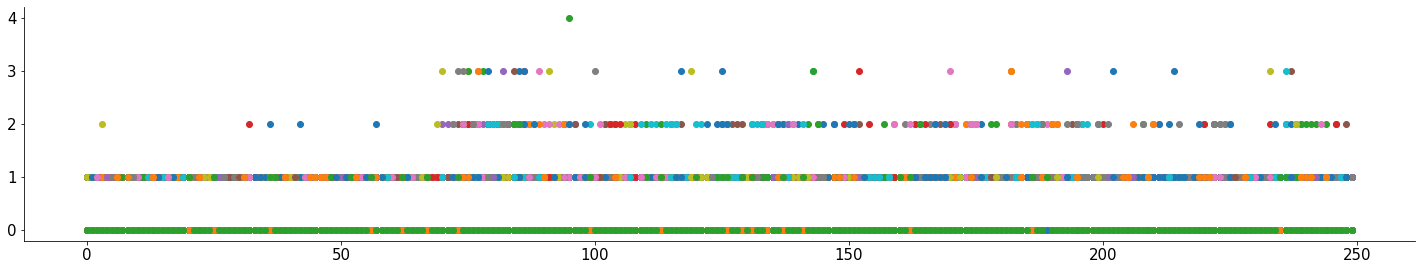

In [65]:
ntrials = len(visual_FR[0][363])
time_vec = np.arange(0,visual_FR[0][363].shape[1])

for trial in range(0,ntrials-1):
    plt.scatter(scatter_vec,visual_FR[0][363][trial,:])

In [86]:
def get_region_lfp(region):
    session_idx ,neuron_idx = region_finder(region) 

    region_spiketimes = {} #create a dictionary with {}
    region_lfp = {}
    for is_session in session_idx:
        region_neurons = np.where(dat_LFP[is_session]["brain_area_lfp"] == region)[0]
        region_spiketimes[is_session] = {}
        region_lfp[is_session] = {}
        
        
        for neuron in region_neurons: 
                                 #visual_FR_test[(is_session,neuron)]=alldat[is_session]["spks"][neuron,:,:]
           # region_spiketimes[is_session][neuron]=dat_ST[is_session]["spks"][neuron,:,:] 
            region_lfp[is_session][neuron]=dat_LFP[is_session]["lfp"][neuron,:,:] 
            #rgion_spiketimes first key is session number (only included are those with selected brain region). 
            # Then neuron number from that brain region.
 
    return region_lfp

region = "VISp" #primary visual cortex
region_lfp = get_region_lfp(region)


In [101]:
np.where(dat_LFP[is_session]["brain_area_lfp"][0]== "VISp")

(array([], dtype=int64),)

In [8]:
# #print(session_idx)# @title Make a plot of which brain areas are present in each dataset
# regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
# region_colors = ['blue', 'red', 'green', 'darkblue', 'violet', 'lightblue', 'orange', 'gray']
# brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
#                 ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
#                 ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
#                 ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP","TT"], # non-visual cortex
#                 ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
#                 ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
#                 ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
#                 ]

# # Assign each area an index
# area_to_index = dict(root=0)
# counter = 1
# for group in brain_groups:
#     for area in group:
#         area_to_index[area] = counter
#         counter += 1

# # Figure out which areas are in each dataset
# areas_by_dataset = np.zeros((counter, len(alldat)), dtype=bool)
# for j, d in enumerate(alldat):
#     for area in np.unique(d['brain_area']):
#         i = area_to_index[area]
#         areas_by_dataset[i, j] = True
        
# ##### Narrow this to visual cortex ######### 

# vis_dataset = areas_by_dataset[0]
